# Badanie i obróbka bazy danych
Jakie dane zawiera wybrana baza danych i jakiej klasyfikacji dokonujemy (która
kolumna, jakie wartości, liczba klas). Ile rekordów zawiera wybrana baza?

- Zbiór danych o chorobach serca. 
- 11 kolumn opisuje 11 cech badanych osób i ostatnia 12 kolumna "target" mówi czy u danej osoby występują choroby serca czy nie (0-1).
- Ilość rekordów: 1190.
- Podział danych: 47% / 53% ( 0 / 1 )

In [1]:
import pandas as pd

df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


- Dokonaj uporządkowania danych. Sprawdź czy nie brakuje pewnych wartości (wskaż procentowy stosunek brakujących danych). Zastanów się nad zastosowaniem normalizacji lub standaryzacji.
- Wyjaśni jak baza danych została przygotowana do klasyfikacji. Czy jakieś kolumny zostały zmodyfikowane? Usunięte? Czy wykryto jakieś błędne dane?

In [2]:
print(df.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [3]:
df["cholesterol"] = round((df["cholesterol"] - df["cholesterol"].min()) / df["cholesterol"].max(), 3)
df["max heart rate"] = round((df["max heart rate"] - df["max heart rate"].min()) / df["max heart rate"].max(), 3)
df["resting bp s"] = round((df["resting bp s"] - df["resting bp s"].min()) / df["resting bp s"].max(), 3)

df["sex"].loc[df["sex"].isin([0, 1])]
df["chest pain type"].loc[df["chest pain type"].isin([1, 2, 3, 4])]
df ["fasting blood sugar"].loc[df["fasting blood sugar"].isin([0, 1])]
df["resting ecg"].loc[df["resting ecg"].isin([0, 1, 2])]
df["exercise angina"].loc[df["exercise angina"].isin([0, 1])]
df["ST slope"].loc[df["ST slope"].isin([0, 1, 2, 3])]
df["target"].loc[df["target"].isin([0, 1])]

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,0.70,0.479,0,0,0.554,0,0.0,1,0
1,49,0,3,0.80,0.299,0,0,0.475,0,1.0,2,1
2,37,1,2,0.65,0.469,0,1,0.188,0,0.0,1,0
3,48,0,4,0.69,0.355,0,0,0.238,1,1.5,2,1
4,54,1,3,0.75,0.323,0,0,0.307,0,0.0,1,0


# Porównanie poznanych klasyfikatorów
• Podziel bazę danych na zbiór testowy i treningowy. Ewaluacji wszystkich
klasyfikatorów dokonuj na jednym zbiorze testowym. Sprawdź czy zbiór
treningowy jest odpowiednio wyważony (zawiera podobną liczbę przypadków
poszczególnych klas). Dokonaj przetasowania danych.

In [5]:
from sklearn.model_selection import train_test_split

df_list = df.values.tolist()

Xt = []
Yt = []

for i in range(len(df_list)):
    Xt.append(df_list[i][0:11])
    Yt.append(df_list[i][11])


X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, test_size=0.3, shuffle=True)

print("Podział danych: ", round(Y_train.count(0.0)/len(Y_train)*100, 2), "% / ", 100-round(Y_train.count(0.0)/len(Y_train)*100, 2), "%")

Podział danych:  47.3 % /  52.7 %


• Przetestuj klasyfikatory poznane na zajęciach
- Naive Bayes
- Drzewa decyzyjne
- k Najbliższych sąsiadów (dla wybranego k)
- Ewaluacja powinna zawierać dokładność klasyfikatora i macierz błędu


# k-najbliższych sąsiadów

Result 82.91 %


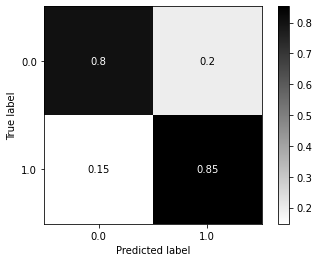

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

knn5 = round(metrics.accuracy_score(Y_test, y_pred)*100, 2)
print("Result", knn5, "%")
plot_confusion_matrix(knn, X_test, Y_test, cmap=plt.cm.binary, normalize='true')

Result 83.19 %


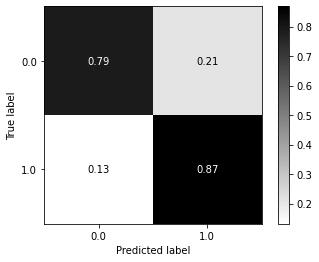

In [7]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

knn11 = round(metrics.accuracy_score(Y_test, y_pred)*100, 2)
print("Result", knn11, "%")
plot_confusion_matrix(knn, X_test, Y_test, cmap=plt.cm.binary, normalize='true')

Result 80.39 %


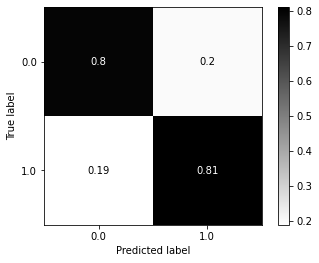

In [8]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

knn20 = round(metrics.accuracy_score(Y_test, y_pred)*100, 2)
print("Result", knn20, "%")
plot_confusion_matrix(knn, X_test, Y_test, cmap=plt.cm.binary, normalize='true')

# Drzewo decyzyjne

Result:  87.39 %


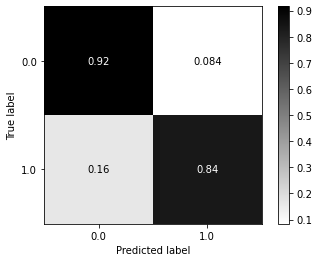

In [9]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)
dd = round(metrics.accuracy_score(Y_test, y_pred)*100, 2)
print("Result: ", dd, "%")
plot_confusion_matrix(clf, X_test, Y_test, cmap=plt.cm.binary, normalize='true')

# Naive Bayes

Result 86.27 %


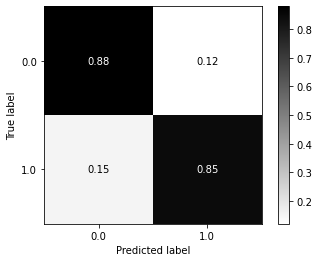

In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)

nb = round(metrics.accuracy_score(Y_test, y_pred)*100, 2)
print("Result", nb, "%")
plot_confusion_matrix(gnb, X_test, Y_test, cmap=plt.cm.binary, normalize='true')

# Rozszerzona klasyfikacja i analiza
• Porównaj skuteczności klasyfikatorów na wykresach.

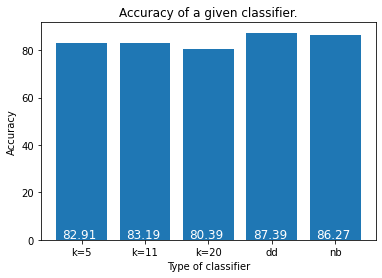

In [11]:
#70%/30%
import numpy as np
values = [knn5, knn11, knn20, dd, nb]
names = ("k=5", "k=11", "k=20", "dd", "nb")
x = np.arange(len(names))

plt.bar(x, values)
plt.xticks(x, names)
plt.text(-0.3, 0.7, knn5, fontsize="large", color="white")
plt.text(0.7, 0.7, knn11, fontsize="large", color="white")
plt.text(1.7, 0.7, knn20, fontsize="large", color="white")
plt.text(2.7, 0.79, dd, fontsize="large", color="white")
plt.text(3.7, 0.75, nb, fontsize="large", color="white")
plt.xlabel('Type of classifier')
plt.ylabel("Accuracy")
plt.title('Accuracy of a given classifier.')
plt.show()

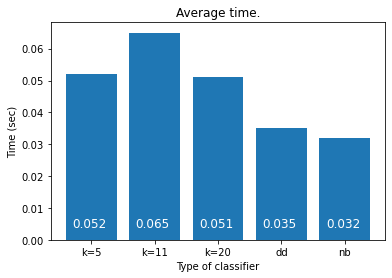

In [12]:
values = [0.052, 0.065, 0.051, 0.035, 0.032]
names = ("k=5", "k=11", "k=20", "dd", "nb")
x = np.arange(len(names))

plt.bar(x, values)
plt.xticks(x, names)
plt.text(-0.3, 0.004, 0.052, fontsize="large", color="white")
plt.text(0.7, 0.004, 0.065, fontsize="large", color="white")
plt.text(1.7, 0.004, 0.051, fontsize="large", color="white")
plt.text(2.7, 0.004, 0.035, fontsize="large", color="white")
plt.text(3.7, 0.004, 0.032, fontsize="large", color="white")
plt.xlabel('Type of classifier')
plt.ylabel("Time (sec)")
plt.title('Average time.')
plt.show()

- Wygeneruj drzewo decyzyjne w postaci grafu. Która cecha została użyta do podziału jako pierwsza?

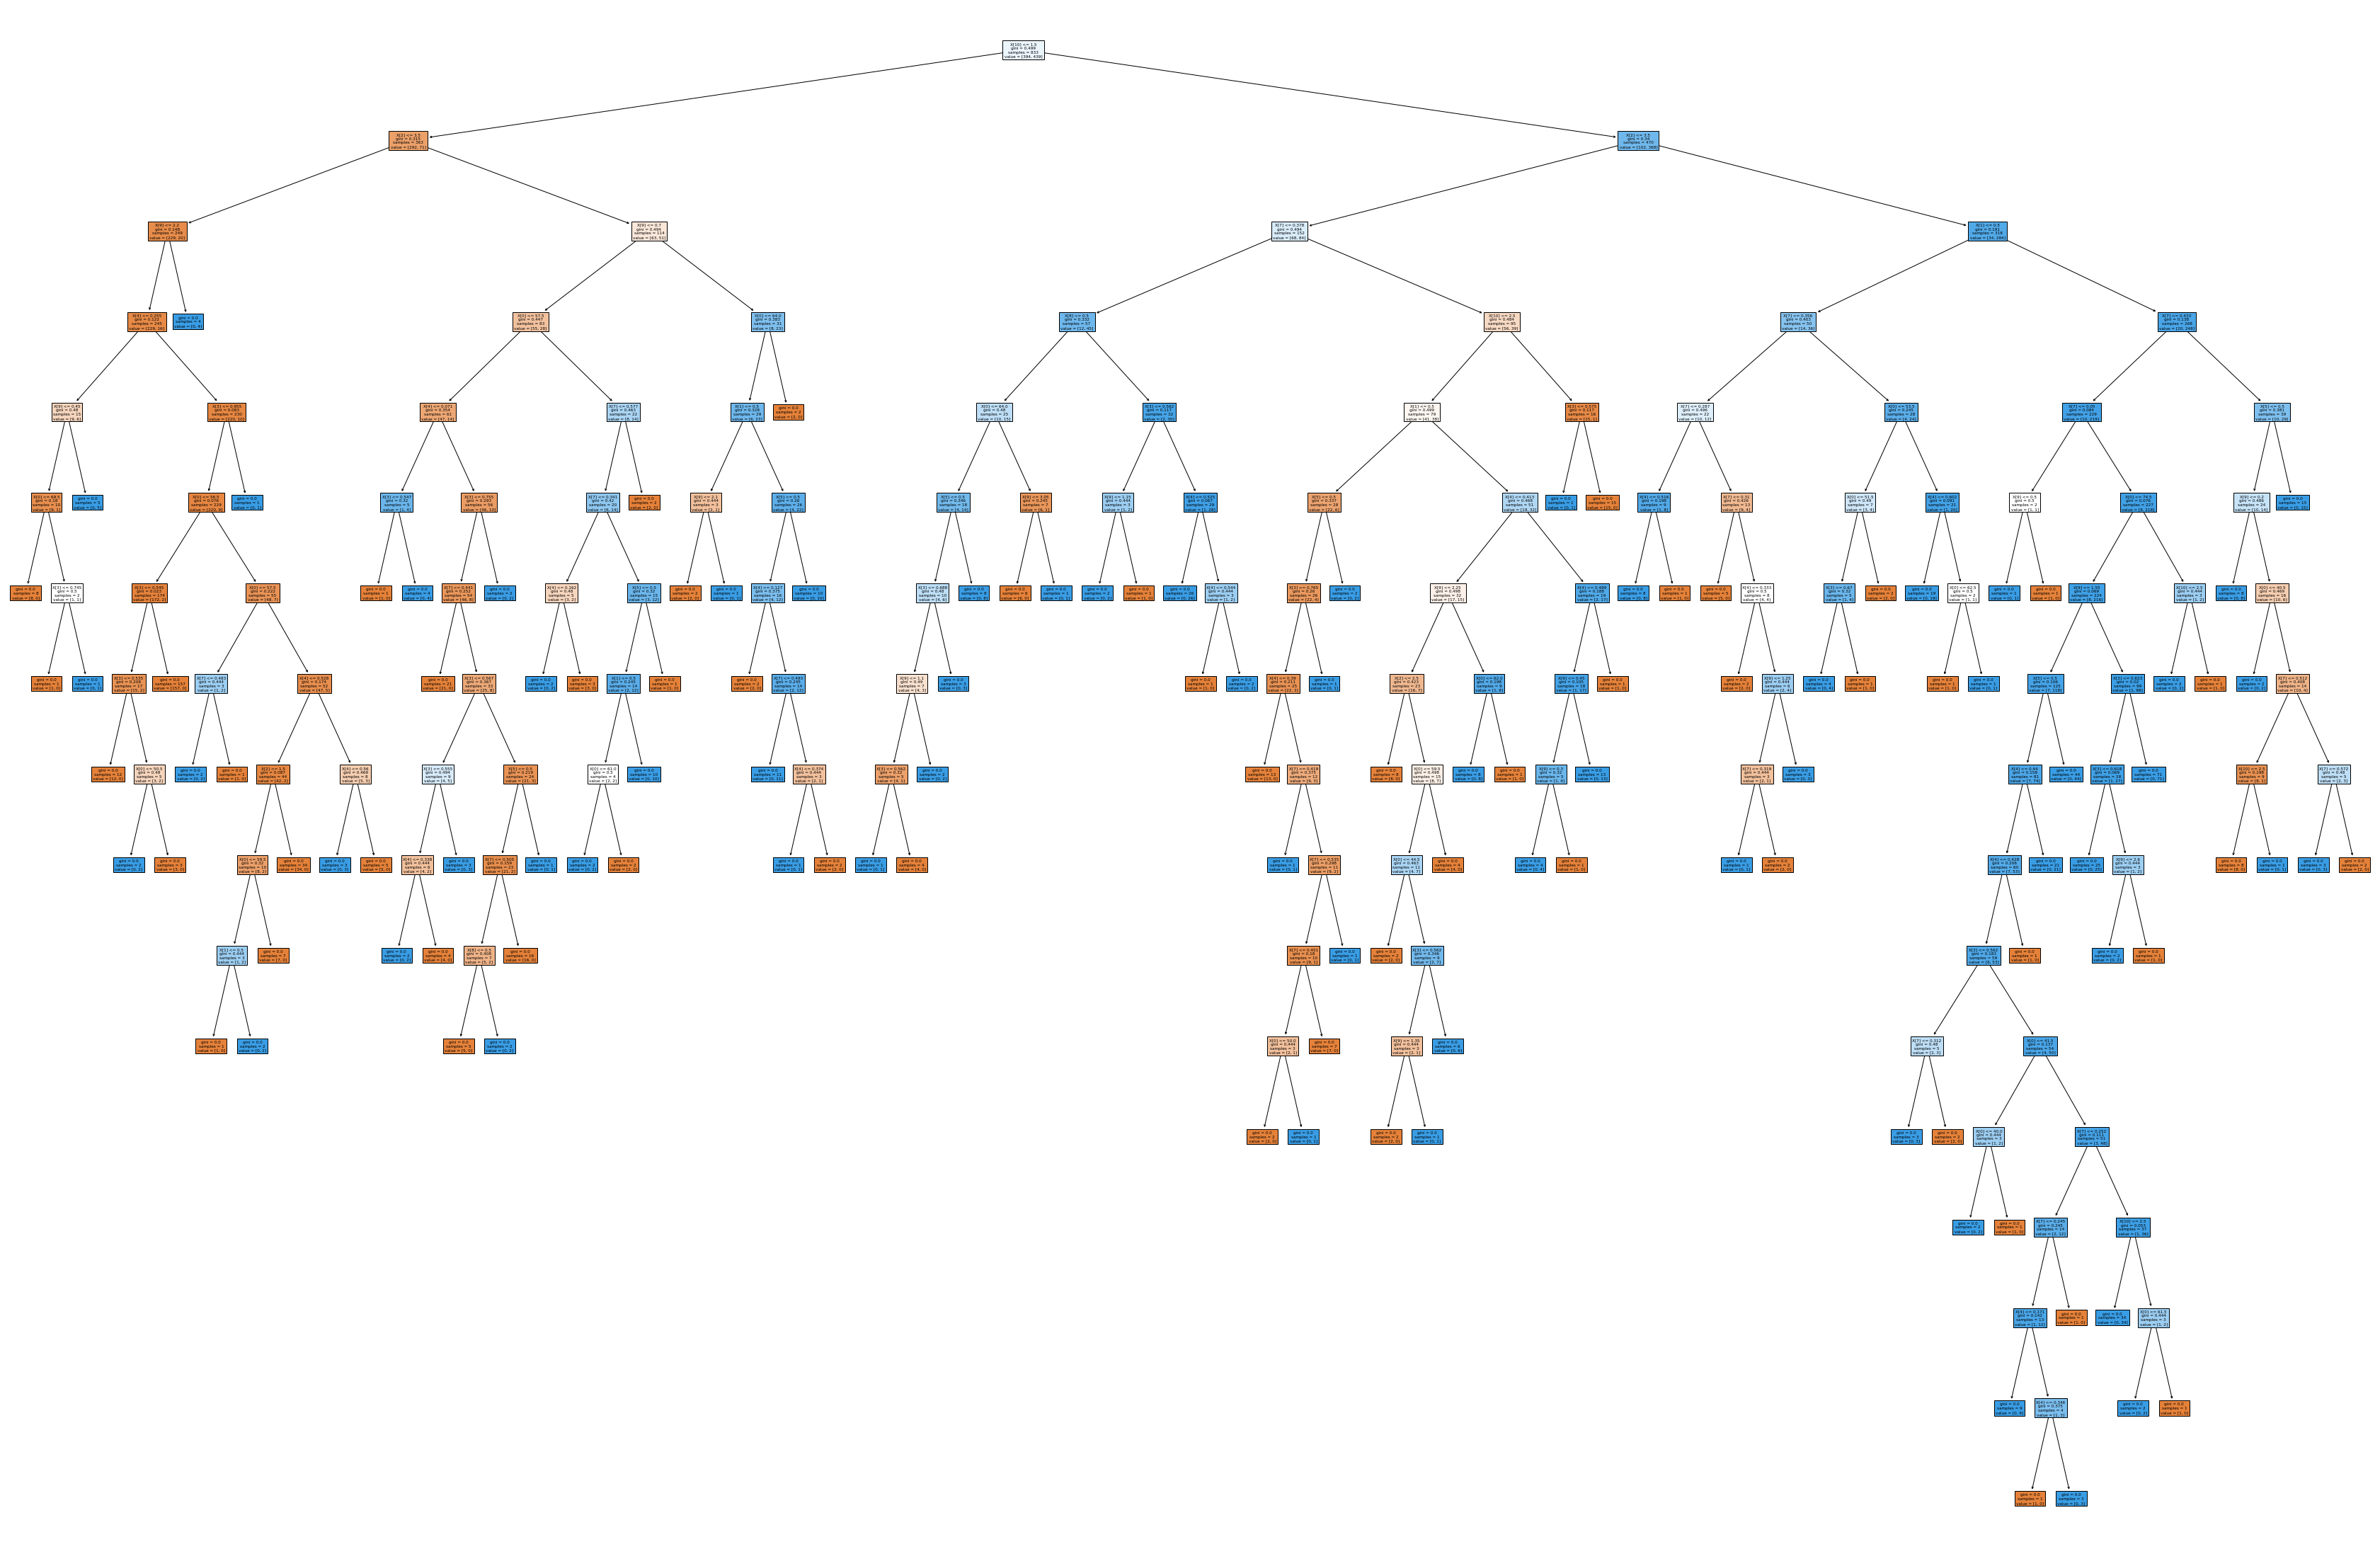

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(60,40))
_ = tree.plot_tree(clf, filled=True)

In [14]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=["age","sex", "chest pain type", "resting bp s", "cholesterol", "fasting blood sugar", "resting ecg", "max heart rate", "exercise angina", "oldpeak", "ST slope"])
print(tree_rules)

|--- ST slope <= 1.50
|   |--- chest pain type <= 3.50
|   |   |--- oldpeak <= 2.20
|   |   |   |--- cholesterol <= 0.26
|   |   |   |   |--- oldpeak <= 0.45
|   |   |   |   |   |--- age <= 69.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- age >  69.50
|   |   |   |   |   |   |--- resting bp s <= 0.75
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- resting bp s >  0.75
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- oldpeak >  0.45
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- cholesterol >  0.26
|   |   |   |   |--- resting bp s <= 0.95
|   |   |   |   |   |--- age <= 56.50
|   |   |   |   |   |   |--- resting bp s <= 0.55
|   |   |   |   |   |   |   |--- resting bp s <= 0.53
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- resting bp s >  0.53
|   |   |   |   |   |   |   |   |--- age <= 50.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- age

- Sprawdź czy proporcja użyta przy podziale na zbiór treningowy i testowy ma znaczący wpływ na ostateczny wynik klasyfikacji.

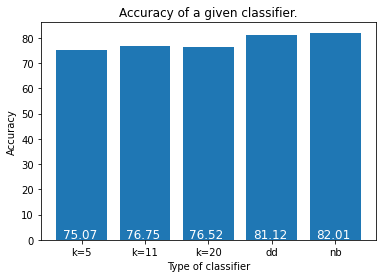

In [15]:
# 50% / 50%
values = [75.07, 76.75, 76.52, 81.12, 82.01]
names = ("k=5", "k=11", "k=20", "dd", "nb")
x = np.arange(len(names))

plt.bar(x, values)
plt.xticks(x, names)
plt.text(-0.3, 0.7, "75.07", fontsize="large", color="white")
plt.text(0.7, 0.7, "76.75", fontsize="large", color="white")
plt.text(1.7, 0.7, "76.52", fontsize="large", color="white")
plt.text(2.7, 0.7, "81.12", fontsize="large", color="white")
plt.text(3.7, 0.7, "82.01", fontsize="large", color="white")
plt.xlabel('Type of classifier')
plt.ylabel("Accuracy")
plt.title('Accuracy of a given classifier.')
plt.show()

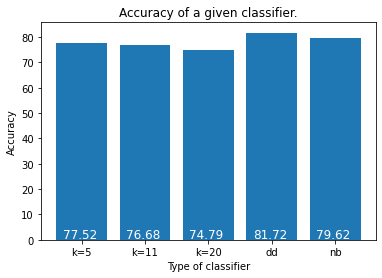

In [16]:
# 60% / 40%
values = [77.52, 76.68, 74.79, 81.72, 79.62]
names = ("k=5", "k=11", "k=20", "dd", "nb")
x = np.arange(len(names))

plt.bar(x, values)
plt.xticks(x, names)
plt.text(-0.3, 0.7, "77.52", fontsize="large", color="white")
plt.text(0.7, 0.7, "76.68", fontsize="large", color="white")
plt.text(1.7, 0.7, "74.79", fontsize="large", color="white")
plt.text(2.7, 0.7, "81.72", fontsize="large", color="white")
plt.text(3.7, 0.7, "79.62", fontsize="large", color="white")
plt.xlabel('Type of classifier')
plt.ylabel("Accuracy")
plt.title('Accuracy of a given classifier.')
plt.show()

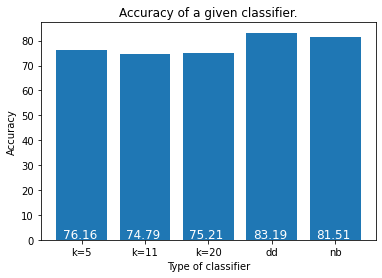

In [17]:
# 80% / 20%
values = [76.16, 74.79, 75.21, 83.19, 81.51]
names = ("k=5", "k=11", "k=20", "dd", "nb")
x = np.arange(len(names))

plt.bar(x, values)
plt.xticks(x, names)
plt.text(-0.3, 0.68, "76.16", fontsize="large", color="white")
plt.text(0.7, 0.68, "74.79", fontsize="large", color="white")
plt.text(1.7, 0.68, "75.21", fontsize="large", color="white")
plt.text(2.7, 0.78, "83.19", fontsize="large", color="white")
plt.text(3.7, 0.75, "81.51", fontsize="large", color="white")
plt.xlabel('Type of classifier')
plt.ylabel("Accuracy")
plt.title('Accuracy of a given classifier.')
plt.show()

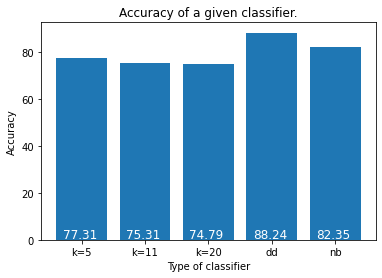

In [18]:
# 90% / 10%
values = [77.31, 75.31, 74.79, 88.24, 82.35]
names = ("k=5", "k=11", "k=20", "dd", "nb")
x = np.arange(len(names))

plt.bar(x, values)
plt.xticks(x, names)
plt.text(-0.3, 0.68, "77.31", fontsize="large", color="white")
plt.text(0.7, 0.68, "75.31", fontsize="large", color="white")
plt.text(1.7, 0.68, "74.79", fontsize="large", color="white")
plt.text(2.7, 0.78, "88.24", fontsize="large", color="white")
plt.text(3.7, 0.75, "82.35", fontsize="large", color="white")
plt.xlabel('Type of classifier')
plt.ylabel("Accuracy")
plt.title('Accuracy of a given classifier.')
plt.show()

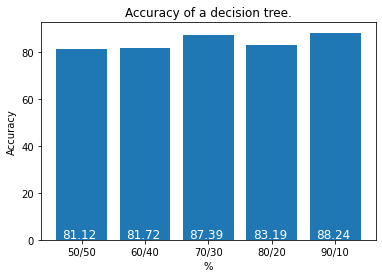

In [19]:
values = [81.12, 81.72, dd, 83.19, 88.24]
names = ("50/50", "60/40", "70/30", "80/20", "90/10")
x = np.arange(len(names))

plt.bar(x, values)
plt.xticks(x, names)
plt.text(-0.3, 0.68, "81.12", fontsize="large", color="white")
plt.text(0.7, 0.68, "81.72", fontsize="large", color="white")
plt.text(1.7, 0.68, dd, fontsize="large", color="white")
plt.text(2.7, 0.78, "83.19", fontsize="large", color="white")
plt.text(3.7, 0.75, "88.24", fontsize="large", color="white")
plt.xlabel('%')
plt.ylabel("Accuracy")
plt.title('Accuracy of a decision tree.')
plt.show()